In [23]:
#import lib
# Disable warning
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [14]:
Data_Path = Path("D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/train")

In [15]:
PNG_Path = list(Data_Path.glob(r"*/*.png"))

In [17]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [18]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [19]:
#Transform to Main Dataframe
Main_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [16]:
dir_list = sorted(os.listdir('D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/train'))
class_names_lst = [dir_name for dir_name in dir_list]
class_names_lst

['incorrect_mask', 'with_mask', 'without_mask']

In [10]:
img_generator = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    rotation_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.1
)
train_data = img_generator.flow_from_directory(
    'D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/train',
    target_size = (255, 255),
    color_mode = 'rgb',
    classes = class_names_lst,
    class_mode = 'categorical',
    batch_size  = 64,
    subset = 'training'
)
valid_data = img_generator.flow_from_directory(
    'D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/train',
    target_size = (255, 255),
    color_mode = 'rgb',
    classes = class_names_lst,
    class_mode = 'categorical',
    batch_size  = 64,
    subset = 'validation'
)
test_generator = ImageDataGenerator(
    rescale = 1. / 255
)
test_data = test_generator.flow_from_directory(
    'D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/train',
    target_size = (255, 255),
    color_mode = 'rgb',
    classes = class_names_lst,
    class_mode = 'categorical',
    batch_size  = 64,
    shuffle = False
)

Found 2930 images belonging to 3 classes.
Found 324 images belonging to 3 classes.
Found 3254 images belonging to 3 classes.


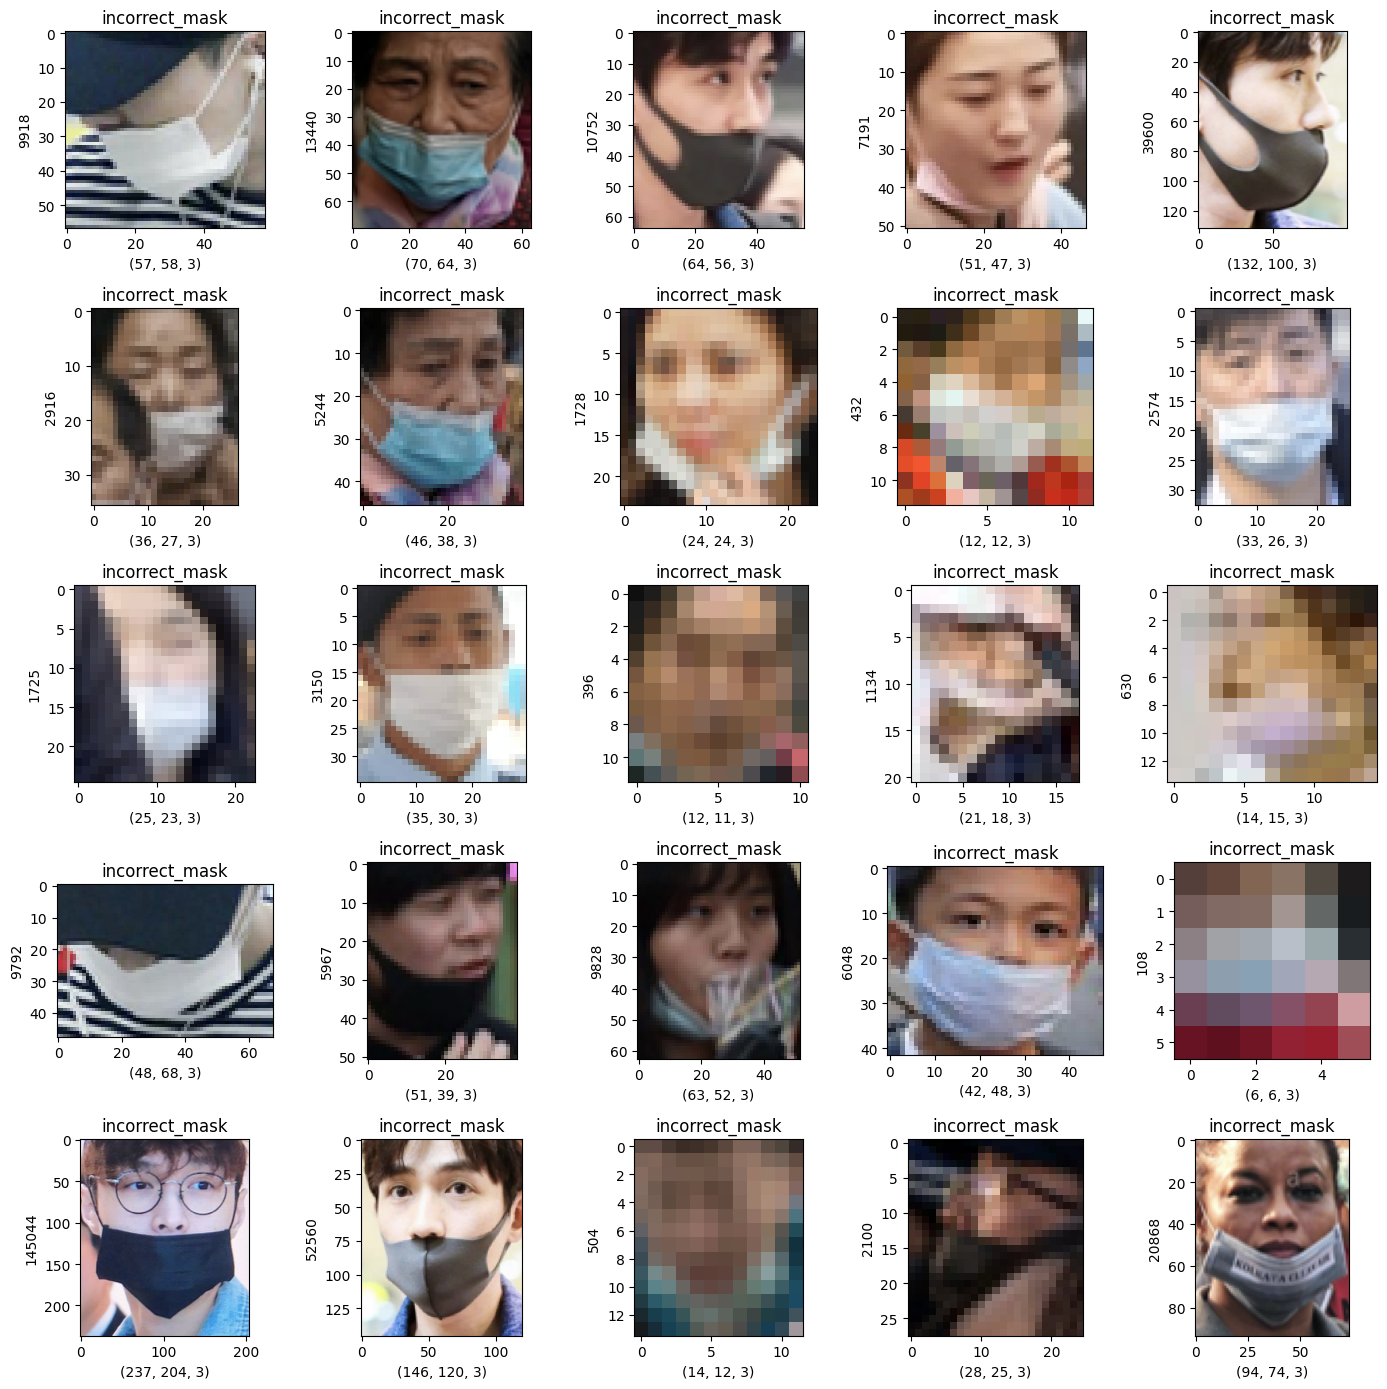

In [20]:
# Image Example Viz
import cv2
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(14,14))

for indexing,run_axes in enumerate(axis.flat):
    Reading_IMG = cv2.imread(Main_Data["PNG"][indexing])
    Transformation_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
    
    run_axes.set_xlabel(Transformation_IMG.shape)
    run_axes.set_ylabel(Transformation_IMG.size)
    run_axes.set_title(Main_Data["CATEGORY"][indexing])
    
    run_axes.imshow(Transformation_IMG)
    
plt.tight_layout()
plt.show()

In [24]:
train_data_generator = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True, vertical_flip = True, zoom_range = 0.1,
    shear_range = 0.1, width_shift_range = 0.2, height_shift_range = 0.2, rotation_range = 90,
)
test_data_generator = keras.preprocessing.image.ImageDataGenerator()

In [26]:
train_data = train_data_generator.flow_from_directory("D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/train", target_size = (128, 128), batch_size = 1, shuffle = True)
test_data = test_data_generator.flow_from_directory("D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/test", target_size = (128,128), batch_size = 1, shuffle = True)

Found 3254 images belonging to 3 classes.
Found 815 images belonging to 3 classes.


In [27]:
labels =train_data.class_indices
labels

{'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2}

In [28]:
def get_array_from_datagen(train_generator):
  x=[]
  y=[]
  train_generator.reset()
  for i in range(train_generator.__len__()):
    a,b=train_generator.next()
    x.append(a)
    y.append(b)
  x=np.array(x, dtype = np.float32)
  y=np.array(y, dtype = np.float32)
  print(x.shape)
  print(y.shape)
  return x,y

X_train, y_train = get_array_from_datagen(train_data)
X_test, y_test = get_array_from_datagen(test_data)

(3254, 1, 128, 128, 3)
(3254, 1, 3)
(815, 1, 128, 128, 3)
(815, 1, 3)


In [29]:
X_train = X_train.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)
y_train = y_train.reshape(-1, 3)
y_test = y_test.reshape(-1, 3)

In [30]:
import gc
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl

input_shape = (128, 128, 3)
class_num = len(labels)

def cnn1():
    return Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Dropout(0.3),
        Conv2D(64, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Dropout(0.3),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(class_num, activation='softmax')
    ])

def cnn2():
    return Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Dropout(0.3),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Dropout(0.3),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Dropout(0.3),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(class_num, activation='softmax')
    ])

def cnn3():
    return Sequential([
        Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'),
        Dropout(0.3),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        Dropout(0.3),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        Dropout(0.3),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(class_num, activation='softmax')
    ])

In [31]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 0,
    min_lr = 0.00001
)
early_stopping = keras.callbacks.EarlyStopping(patience=5, verbose=1)

In [32]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [33]:
model = cnn1()
model.compile(optimizer="Adam", loss=["categorical_crossentropy"], metrics = ["accuracy"])
history = model.fit(X_train, y_train ,epochs=25, validation_data=(X_test, y_test),
                    verbose=2, callbacks = [learning_rate_reduction, early_stopping])
gc.collect()

Epoch 1/25
102/102 - 237s - loss: 4.0259 - accuracy: 0.7769 - val_loss: 0.3987 - val_accuracy: 0.9104 - lr: 0.0010 - 237s/epoch - 2s/step
Epoch 2/25
102/102 - 207s - loss: 0.3652 - accuracy: 0.8875 - val_loss: 0.3569 - val_accuracy: 0.9031 - lr: 0.0010 - 207s/epoch - 2s/step
Epoch 3/25
102/102 - 208s - loss: 0.3053 - accuracy: 0.8998 - val_loss: 0.3643 - val_accuracy: 0.9055 - lr: 0.0010 - 208s/epoch - 2s/step
Epoch 4/25
102/102 - 222s - loss: 0.3128 - accuracy: 0.9053 - val_loss: 0.3963 - val_accuracy: 0.8564 - lr: 0.0010 - 222s/epoch - 2s/step
Epoch 5/25
102/102 - 199s - loss: 0.2483 - accuracy: 0.9170 - val_loss: 0.2895 - val_accuracy: 0.9166 - lr: 5.0000e-04 - 199s/epoch - 2s/step
Epoch 6/25
102/102 - 198s - loss: 0.2171 - accuracy: 0.9266 - val_loss: 0.3368 - val_accuracy: 0.9166 - lr: 5.0000e-04 - 198s/epoch - 2s/step
Epoch 7/25
102/102 - 199s - loss: 0.1933 - accuracy: 0.9382 - val_loss: 0.3814 - val_accuracy: 0.8945 - lr: 5.0000e-04 - 199s/epoch - 2s/step
Epoch 8/25
102/102 - 1

1574

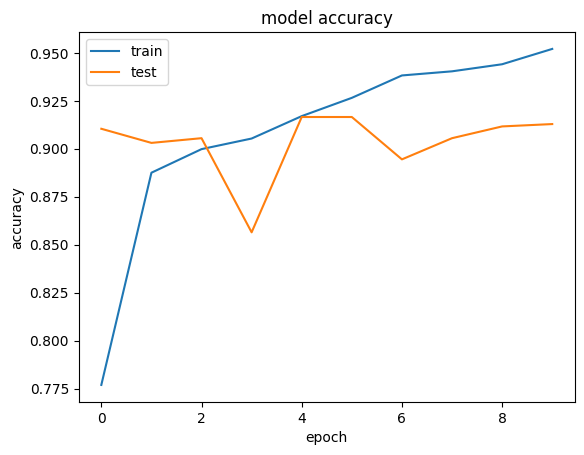

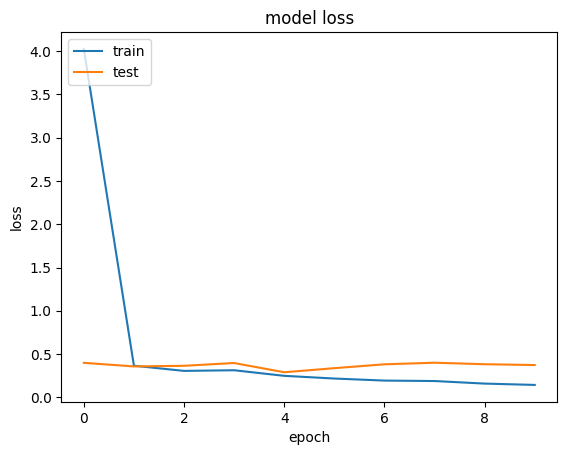

In [34]:
plot_history(history)

In [36]:
model = cnn2()
model.compile(optimizer="Adam", loss=["categorical_crossentropy"], metrics = ["accuracy"])
history = model.fit(X_train, y_train ,epochs=25, validation_data=(X_test, y_test),
                    verbose=2, callbacks = [learning_rate_reduction, early_stopping])
gc.collect()

Epoch 1/25
102/102 - 129s - loss: 0.9038 - accuracy: 0.8482 - val_loss: 0.5579 - val_accuracy: 0.8037 - lr: 0.0010 - 129s/epoch - 1s/step
Epoch 2/25
102/102 - 132s - loss: 0.3538 - accuracy: 0.8872 - val_loss: 0.7591 - val_accuracy: 0.8258 - lr: 0.0010 - 132s/epoch - 1s/step
Epoch 3/25
102/102 - 134s - loss: 0.3041 - accuracy: 0.8983 - val_loss: 0.5532 - val_accuracy: 0.8933 - lr: 0.0010 - 134s/epoch - 1s/step
Epoch 4/25
102/102 - 137s - loss: 0.2889 - accuracy: 0.9100 - val_loss: 0.3029 - val_accuracy: 0.8945 - lr: 0.0010 - 137s/epoch - 1s/step
Epoch 5/25
102/102 - 136s - loss: 0.2489 - accuracy: 0.9127 - val_loss: 0.3871 - val_accuracy: 0.8564 - lr: 0.0010 - 136s/epoch - 1s/step
Epoch 6/25
102/102 - 137s - loss: 0.2276 - accuracy: 0.9241 - val_loss: 0.3223 - val_accuracy: 0.9006 - lr: 0.0010 - 137s/epoch - 1s/step
Epoch 7/25
102/102 - 137s - loss: 0.1994 - accuracy: 0.9302 - val_loss: 0.3945 - val_accuracy: 0.8847 - lr: 0.0010 - 137s/epoch - 1s/step
Epoch 8/25
102/102 - 136s - loss: 

3588

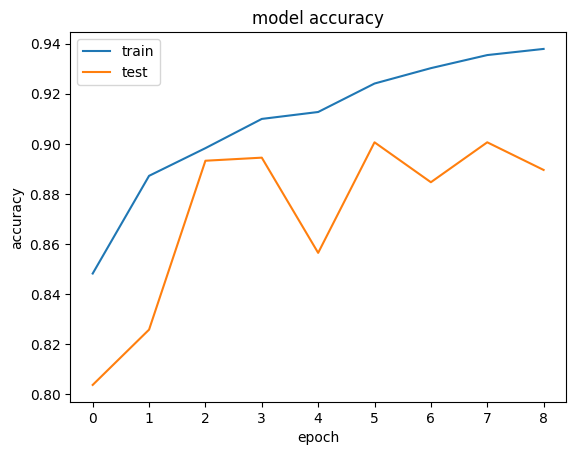

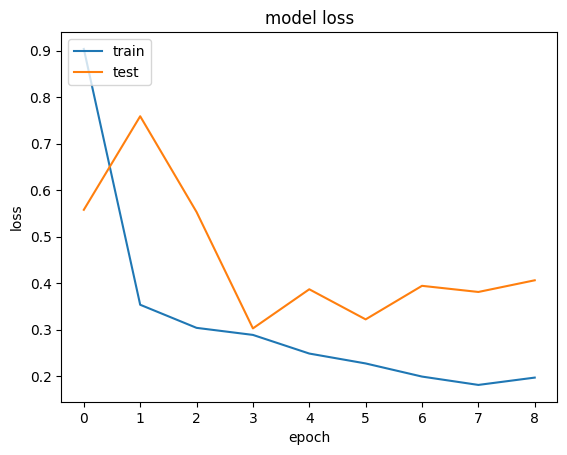

In [37]:
plot_history(history)

In [38]:
model = cnn3()
model.compile(optimizer="Adam", loss=["categorical_crossentropy"], metrics = ["accuracy"])
history = model.fit(X_train, y_train ,epochs=25, validation_data=(X_test, y_test),
                    verbose=2, callbacks = [learning_rate_reduction, early_stopping])
gc.collect()

Epoch 1/25
102/102 - 757s - loss: 2.1380 - accuracy: 0.8095 - val_loss: 0.4440 - val_accuracy: 0.8380 - lr: 0.0010 - 757s/epoch - 7s/step
Epoch 2/25
102/102 - 767s - loss: 0.3556 - accuracy: 0.8921 - val_loss: 0.3922 - val_accuracy: 0.9080 - lr: 0.0010 - 767s/epoch - 8s/step
Epoch 3/25
102/102 - 772s - loss: 0.3247 - accuracy: 0.9020 - val_loss: 0.4676 - val_accuracy: 0.9252 - lr: 0.0010 - 772s/epoch - 8s/step
Epoch 4/25
102/102 - 752s - loss: 0.3074 - accuracy: 0.9035 - val_loss: 0.3871 - val_accuracy: 0.9117 - lr: 0.0010 - 752s/epoch - 7s/step
Epoch 5/25
102/102 - 718s - loss: 0.2923 - accuracy: 0.9069 - val_loss: 0.4013 - val_accuracy: 0.9080 - lr: 0.0010 - 718s/epoch - 7s/step
Epoch 6/25
102/102 - 701s - loss: 0.2918 - accuracy: 0.9103 - val_loss: 0.5827 - val_accuracy: 0.8945 - lr: 0.0010 - 701s/epoch - 7s/step
Epoch 7/25
102/102 - 694s - loss: 0.2448 - accuracy: 0.9204 - val_loss: 0.4131 - val_accuracy: 0.8994 - lr: 5.0000e-04 - 694s/epoch - 7s/step
Epoch 8/25
102/102 - 692s - lo

7733

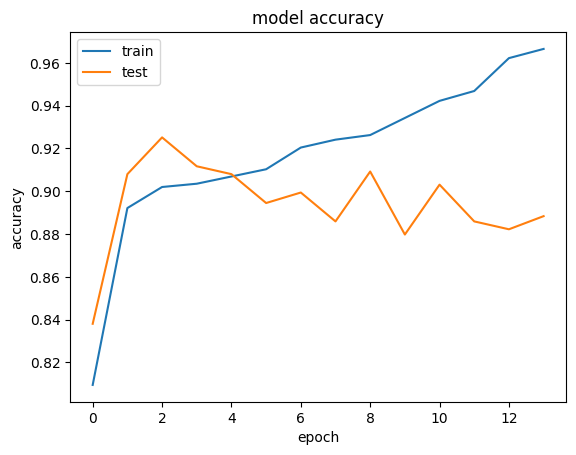

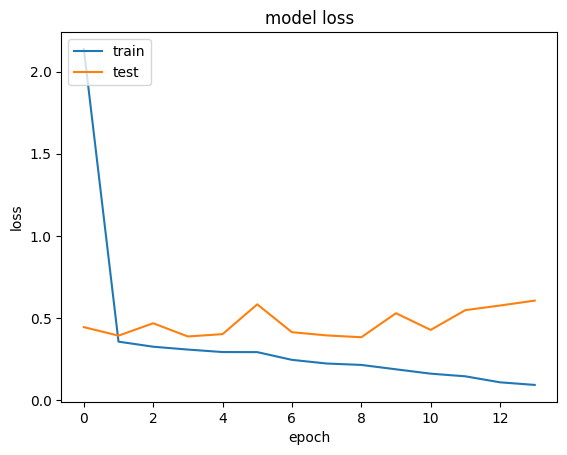

In [39]:
plot_history(history)

In [40]:
effnet_model = tf.keras.applications.EfficientNetB0(include_top=False)

16705208/16705208 [==============================] - 19s 1us/step


In [41]:
model = keras.Sequential([
    effnet_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer="Adam",
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    callbacks = [learning_rate_reduction, early_stopping]
)

Epoch 1/25
102/102 [==============================] - 258s 2s/step - loss: 0.3776 - accuracy: 0.8669 - val_loss: 0.2892 - val_accuracy: 0.9362 - lr: 0.0010
Epoch 2/25
102/102 [==============================] - 233s 2s/step - loss: 0.1576 - accuracy: 0.9511 - val_loss: 0.2540 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 3/25
102/102 [==============================] - 234s 2s/step - loss: 0.0845 - accuracy: 0.9708 - val_loss: 0.3816 - val_accuracy: 0.9509 - lr: 0.0010
Epoch 4/25
102/102 [==============================] - 230s 2s/step - loss: 0.0628 - accuracy: 0.9825 - val_loss: 0.3213 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 5/25
102/102 [==============================] - 231s 2s/step - loss: 0.0539 - accuracy: 0.9822 - val_loss: 0.3764 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 6/25
102/102 [==============================] - 231s 2s/step - loss: 0.0360 - accuracy: 0.9899 - val_loss: 0.3596 - val_accuracy: 0.9227 - lr: 0.0010
Epoch 7/25
102/102 [==============================] - 232s 2s/st

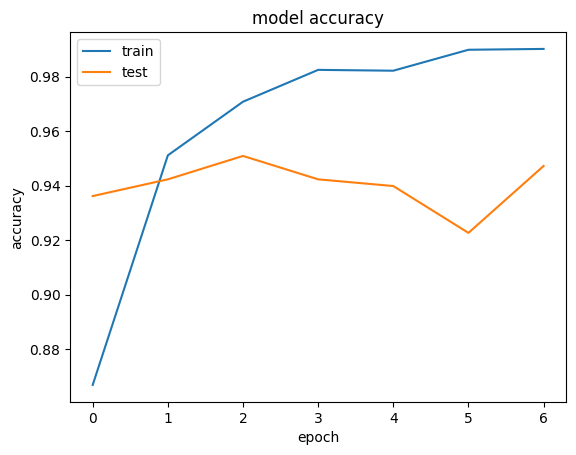

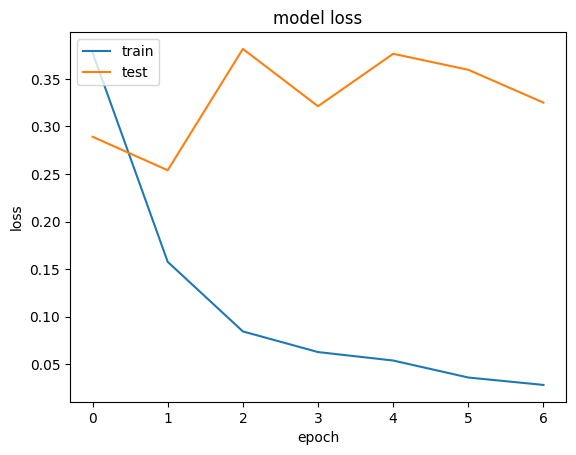

In [42]:
plot_history(history)

In [43]:
resnet_model = tf.keras.applications.ResNet50(include_top=False)

94765736/94765736 [==============================] - 199s 2us/step


In [44]:
model = keras.Sequential([
    resnet_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer="Adam",
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    callbacks = [learning_rate_reduction, early_stopping]
)

Epoch 1/25
102/102 [==============================] - 486s 5s/step - loss: 0.4988 - accuracy: 0.8712 - val_loss: 542143.6875 - val_accuracy: 0.7939 - lr: 0.0010
Epoch 2/25
102/102 [==============================] - 459s 4s/step - loss: 0.3704 - accuracy: 0.8900 - val_loss: 3.6135 - val_accuracy: 0.8945 - lr: 0.0010
Epoch 3/25
102/102 [==============================] - 547s 5s/step - loss: 0.2903 - accuracy: 0.9081 - val_loss: 0.6650 - val_accuracy: 0.9129 - lr: 0.0010
Epoch 4/25
102/102 [==============================] - 498s 5s/step - loss: 0.2328 - accuracy: 0.9241 - val_loss: 0.2160 - val_accuracy: 0.9264 - lr: 0.0010
Epoch 5/25
102/102 [==============================] - 488s 5s/step - loss: 0.1983 - accuracy: 0.9305 - val_loss: 0.3267 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 6/25
102/102 [==============================] - 486s 5s/step - loss: 0.1825 - accuracy: 0.9392 - val_loss: 0.2363 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 7/25
102/102 [==============================] - 487s 

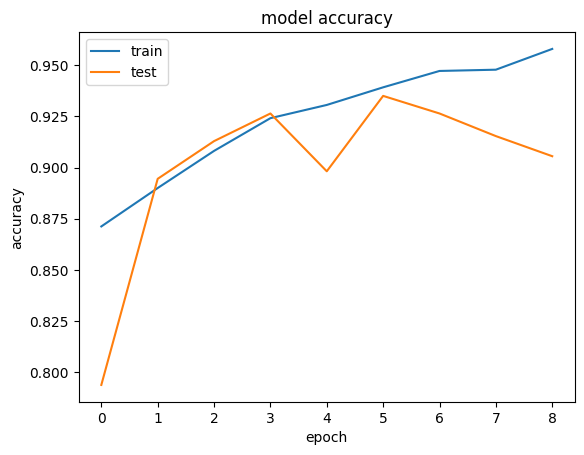

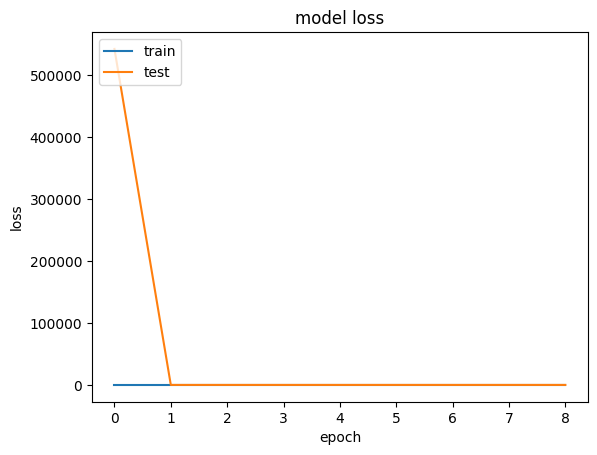

In [45]:
plot_history(history)

akurasi paling bagus effnet 0.94 atau 94%

In [46]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer="Adam",
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=14,
    callbacks = [learning_rate_reduction],
    verbose = 0
)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis = 1), model.predict(X_test).argmax(axis = 1)))

26/26 [==============================] - 28s 516ms/step
              precision    recall  f1-score   support

           0       0.88      0.28      0.42        25
           1       0.98      0.97      0.97       647
           2       0.84      0.99      0.91       143

    accuracy                           0.95       815
   macro avg       0.90      0.74      0.77       815
weighted avg       0.95      0.95      0.94       815



In [60]:
import os
from shutil import copyfile
os.mkdir("./test_data")
os.mkdir("./test_data/with_mask")
os.mkdir("./test_data/mask_weared_incorrect")
os.mkdir("./test_data/without_mask")

In [79]:
paths = []
names = []
k = 0
path = "D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/test/incorrect_mask"
for i in os.listdir(path):
    paths.append(path + "/" + i)
    names.append("incorrect_mask")
    copyfile(path + "/" + i, f"test_data/incorrect_mask/{i}")
    k += 1
    if k == 8:
        break
k = 0
path = "D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/test/with_mask/"
for i in os.listdir(path):
    paths.append(path + "/" + i)
    names.append("with_mask")
    copyfile(path + "/" + i, f"test_data/with_mask/{i}")
    k += 1
    if k == 8:
        break
path = "D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/test/without_mask/"
k = 0
for i in os.listdir(path):
    paths.append(path + "/" + i)
    names.append("without_mask")
    copyfile(path + "/" + i,  f"test_data/without_mask/{i}")
    k += 1
    if k == 8:
        break

FileNotFoundError: [Errno 2] No such file or directory: 'test_data/incorrect_mask/maksssksksss145_(91, 89).png'

In [80]:
test_data_2 = test_data_generator.flow_from_directory("D:/dy/CoolYeah/SMT 7/DL/Deep_Learning_Kelompok1/Dataset/images/test_data", target_size = (128,128), batch_size = 1, shuffle = False)

Found 815 images belonging to 3 classes.


In [81]:
print(labels)
labels_2 = {}
for k,v in labels.items():
    labels_2[v] = k
labels_2

{'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2}


{0: 'incorrect_mask', 1: 'with_mask', 2: 'without_mask'}

In [65]:
predictions = model.predict(test_data_2).argmax(axis = 1)
pred_label = []
for i in predictions:
    pred_label.append(labels_2[i])
pred_label

815/815 [==============================] - 43s 52ms/step


['without_mask',
 'with_mask',
 'incorrect_mask',
 'with_mask',
 'without_mask',
 'incorrect_mask',
 'with_mask',
 'without_mask',
 'with_mask',
 'with_mask',
 'incorrect_mask',
 'with_mask',
 'without_mask',
 'incorrect_mask',
 'with_mask',
 'without_mask',
 'incorrect_mask',
 'incorrect_mask',
 'with_mask',
 'without_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'incorrect_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'without_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with

IndexError: list index out of range

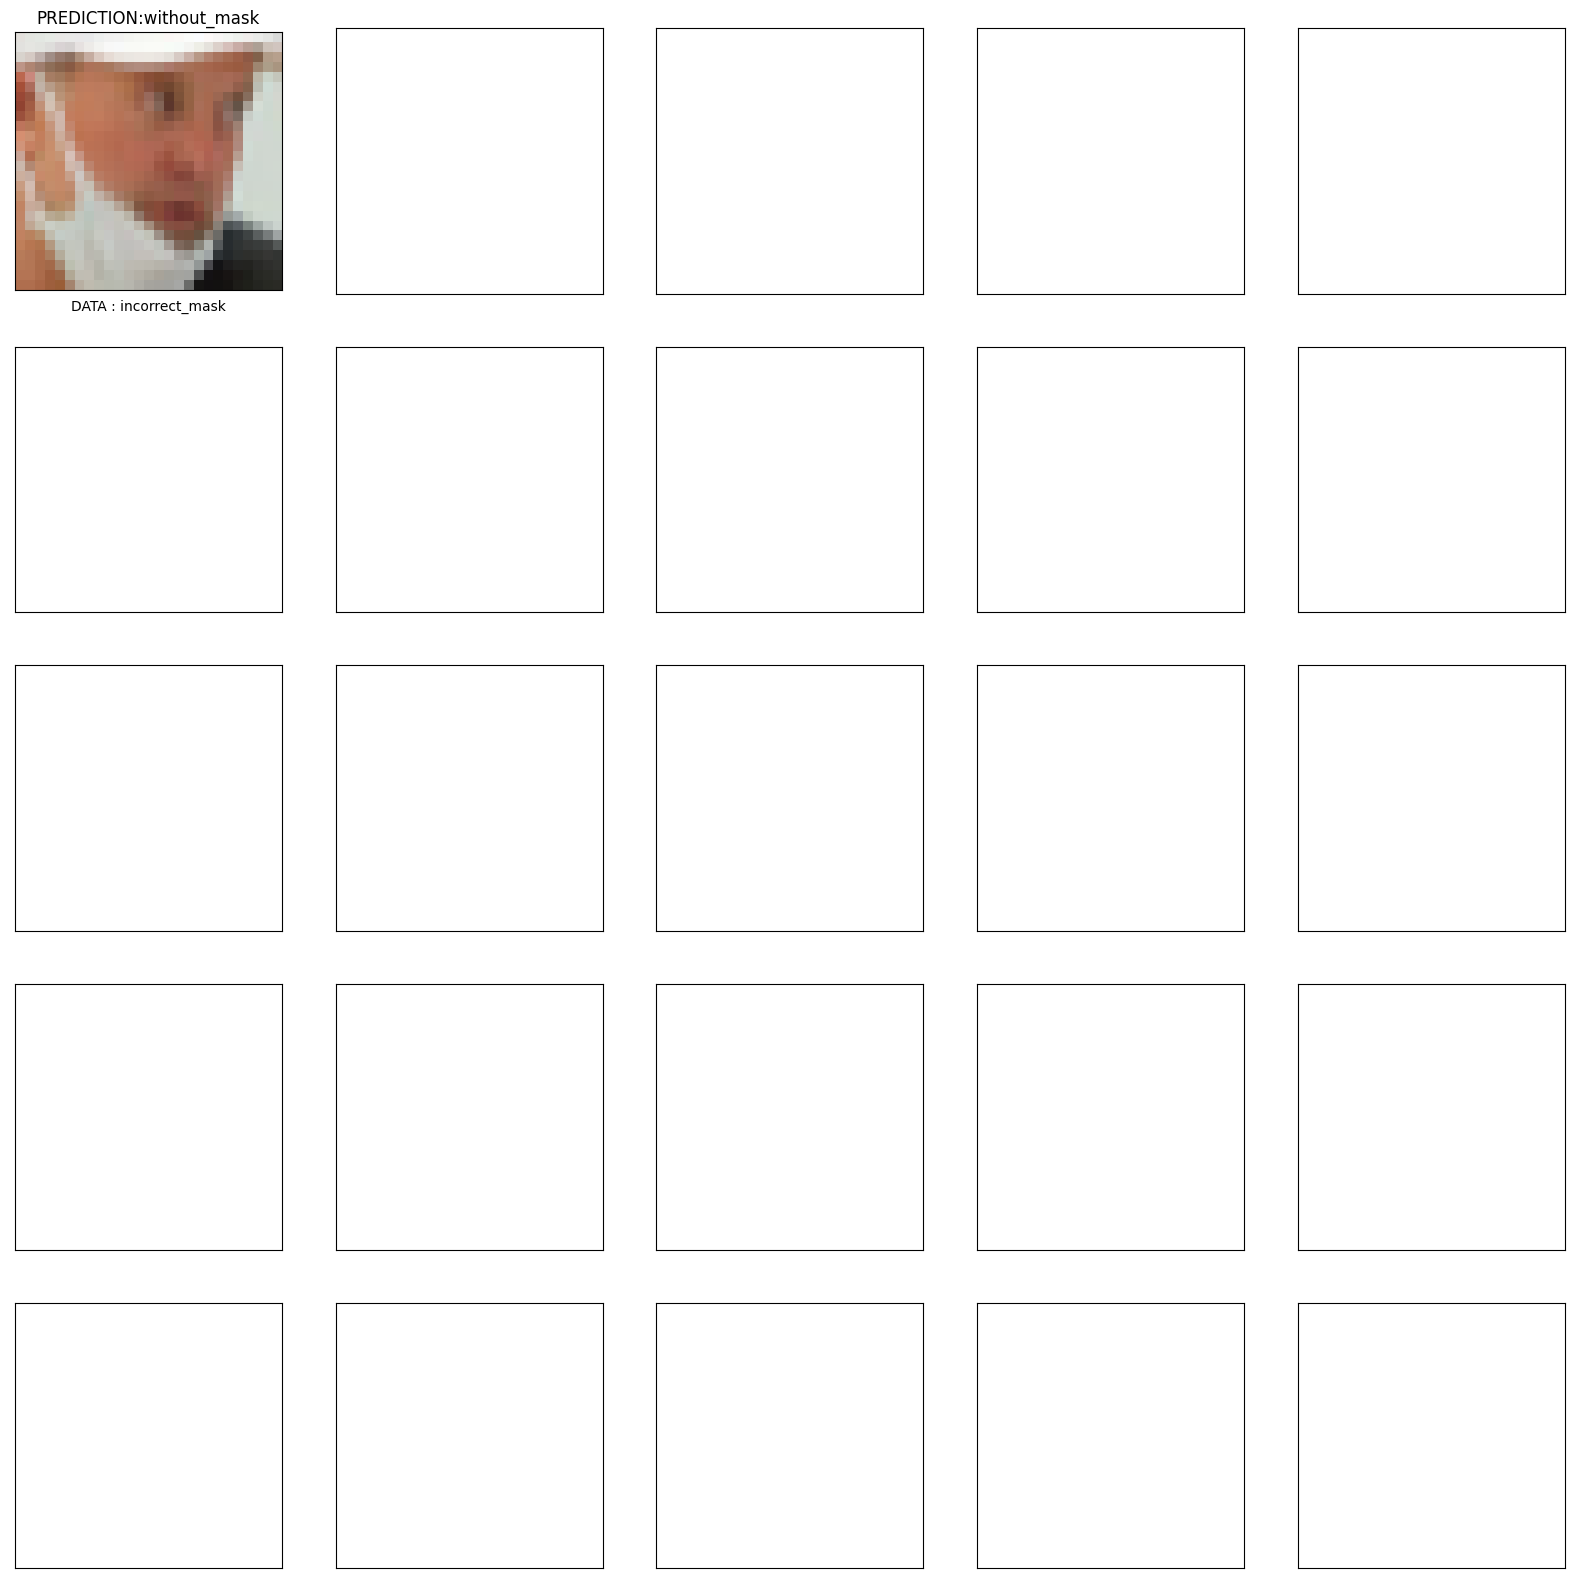

In [86]:
import os
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(paths[i]))
    ax.set_title(f"PREDICTION:{pred_label[i]}")
    ax.set_xlabel(f"DATA : {names[i]}")
#plt.tight_layout()
plt.show()

In [87]:
model.save('effnet.h5')

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.